In [17]:
%matplotlib inline
import scipy.special
import random, math, pylab, os
import numpy as np
import matplotlib.pyplot as plt

In [18]:
#padding on the y axis between label and axis
plt.rcParams['ytick.major.pad']='10'

dpi_out = 400
fig_width = 3.39
golden_mean = (np.sqrt(5)-1.0)/2.0    # Aesthetic ratio
fig_height = fig_width*golden_mean # height in inches
MAX_HEIGHT_INCHES = 8.0
if fig_height > MAX_HEIGHT_INCHES:
    print("WARNING: fig_height too large:" + fig_height + 
          "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
    fig_height = MAX_HEIGHT_INCHES
#fig, ax = plt.subplots(figsize = (fig_width, fig_height), dpi=400, frameon=True)
small_tick_size = 8
small_label_size = 8

In [19]:
# For tikz, you need to clone the repo at
# https://github.com/mkrphys/ipython-tikzmagic
# and follow the install instructions.
%load_ext tikzmagic

The tikzmagic extension is already loaded. To reload it, use:
  %reload_ext tikzmagic


# Tutorial 4: Sampling discrete, and continuous one-dimensional distributions

## Uniform sampling

In the previous lectures and tutorials, we have made a heavy use of computer-generated random numbers, without really considering how this feat can be achieved by as deterministic a system  as a computer. The code below implements a basic uniform random number generator. This is called a simplified linear congruentional random number generator. Starting from a seed, it generates a deterministic, but seemingly erratic sequence of integers. The modulo operator folds back this sequence of integers into a chosen interval, hence the name "congruential"

In [20]:
m = 134456
n = 8121
k = 28411
idum = 1000
rans = []
idums = []
for iteration in xrange(200000):
    idum = (idum *  n + k) % m
    idums.append(idum)
    ran = idum / float(m)
    rans.append(ran)
print np.array(idums)
print np.array(rans)

[82051   646 30793 ..., 15698 47581  7168]
[ 0.61024424  0.00480455  0.22901916 ...,  0.11675195  0.35387785
  0.05331112]


While this program is deterministic, the sequence of numbers it generates varies with the seed. The method "random.uniform" of Python takes care of modifying the seed of the generated sequence, unless special instructions are given.

### Questions

What is the range of the integers idum in the program above?
1. From 1 to m
2. From 0 to m
3. from 0 to (m-1)

Does the generator produce all the integers inside the range determined in the previous question?

What happens when idum takes a value which has already been reached before?
1. The program continues to generate new random numbers, independent from the numbers it generated before.
2. The output is periodic. The program generates the same numbers it generated before.
3. The linear congruentional random number generator can generate only up to m random numbers. If we try to generate more of them, the program crashes.

This last characteristic, plus the fact that there are no holes, makes the distribution perfectly flat.

You can learn more about the Python random number generator by studying the documentation, or by testing out the program  below.

In [22]:
print 'random seed'
random.seed('MONTE-CARLO-SEED')
for i in range(4):
    print random.uniform(0.0, 1.0)
print
random.seed('MONTE-CARLO-SEED')
for i in range(4):
    print random.uniform(0.0, 10.0)
print
print 'random integers'
random.seed(12315)
for i in range(10):
    print random.randint(0, 4)
print 'random permutation of elements that are not all numbers'
L = [1, 2, 'MONTE-CARLO-SEED', [1.1, 2.1]]
for i in range(10): 
    random.shuffle(L)
    print L 
    print random.choice(L)
print 'read the documentation of the module "random" in Python'

random seed
0.627129728695
0.565416995234
0.436108087852
0.898283937052

6.27129728695
5.65416995234
4.36108087852
8.98283937052

random integers
4
1
0
4
2
0
3
2
4
3
random permutation of elements that are not all numbers
[[1.1, 2.1], 'MONTE-CARLO-SEED', 1, 2]
2
[[1.1, 2.1], 1, 2, 'MONTE-CARLO-SEED']
2
[1, [1.1, 2.1], 2, 'MONTE-CARLO-SEED']
[1.1, 2.1]
[1, [1.1, 2.1], 2, 'MONTE-CARLO-SEED']
2
['MONTE-CARLO-SEED', 2, [1.1, 2.1], 1]
1
[[1.1, 2.1], 1, 2, 'MONTE-CARLO-SEED']
[1.1, 2.1]
[2, 1, [1.1, 2.1], 'MONTE-CARLO-SEED']
2
[[1.1, 2.1], 2, 1, 'MONTE-CARLO-SEED']
2
['MONTE-CARLO-SEED', 1, 2, [1.1, 2.1]]
1
[[1.1, 2.1], 'MONTE-CARLO-SEED', 1, 2]
2
read the documentation of the module "random" in Python


## Rejection sampling

The Metropolis algorithm has been used extensively in the previous sessions. Remind that it consists in applying the following rule: $p(a \to b) = \min \biggl(1, \dfrac{\pi(a)}{\pi(b)} \biggr)$. In order to determine if a move is accepted or rejected, we need to generate a random number $\Upsilon$ between 0 and 1. if $\Upsilon < p(a \to b)$, the move is accepted, otherwise it is rejected. It can happend that $p(a \to b) = 1$, in which case we do not need to carry out the comparison. We will now use the Metropolis algorithm to sample the one-dimensional Gaussian distribution, $\pi(x) = \dfrac{e^{-x^2/2}}{\sqrt{2\pi}}$ in the program below. Make sure you understand how it works, and note that it is not necessary to use the $\min$ function at all.

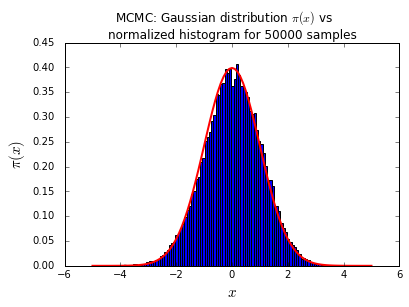

In [28]:
x = 0.0
delta = 0.5
data = []
for k in range(50000):
    x_new = x + random.uniform(-delta, delta)
    if random.uniform(0.0, 1.0) <  \
         math.exp (- x_new ** 2 / 2.0) / math.exp (- x ** 2 / 2.0): 
        x = x_new 
    data.append(x)

pylab.hist(data, 100, normed = 'True')
x = [a / 10.0 for a in range(-50, 51)]
y = [math.exp(- a ** 2 / 2.0) / math.sqrt(2.0 * math.pi) for a in x]
pylab.plot(x, y, c='red', linewidth=2.0)
pylab.title('MCMC: Gaussian distribution $\pi(x)$ vs \
    \nnormalized histogram for '+str(len(data))+' samples', fontsize = 12)
pylab.xlabel('$x$', fontsize = 15)
pylab.ylabel('$\pi(x)$', fontsize = 15)
pylab.savefig('plot_markov_gauss.pdf')
pylab.show()

The graphical output shows that the algorithm samples the Gaussian distribution nicely, but another, more efficient route is possible, and that is the rejection sampling, within a direct sampling approach. In order to do this, we can put the Gaussian into a box, with limits $\pm x_{\text{cut}}$. Equipped with this, we can proceed in the same way as we did for the evaluation of $\pi$, i.e. throw pebbles into the rectangular box, and accept the throw as a hit if and only if it lands below the Gaussian curve.

The probability that a pebble, landing at position $x$, lands below the function profile is proportional to the function itself at this position, i.e. the proportion of accepted pebbles is $\pi(x)$. The program below implements this approach.

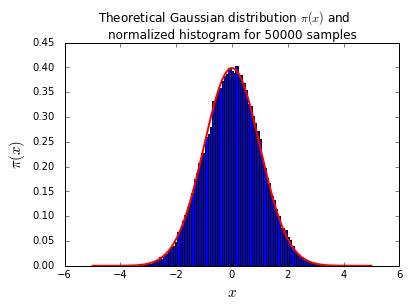

In [29]:
y_max = 1.0 / math.sqrt(2.0 * math.pi)
x_cut = 5.0
n_data = 50000
n_accept = 0
data = []
while n_accept < n_data:
    y = random.uniform(0.0, y_max)
    x = random.uniform(-x_cut, x_cut)
    if y < math.exp( - x **2 / 2.0)/math.sqrt(2.0 * math.pi): 
        n_accept += 1
        data.append(x)\

##### Graphics
pylab.hist(data, 100, normed = 'True')
x = np.linspace(-x_cut, x_cut, num=100)
y = np.exp(- x ** 2 / 2.0) / math.sqrt(2.0 * math.pi)
pylab.plot(x, y, c='red', linewidth=2.0)
pylab.title('Theoretical Gaussian distribution $\pi(x)$ and \
    \nnormalized histogram for '+str(len(data))+' samples', fontsize = 12)
pylab.xlabel('$x$', fontsize = 15)
pylab.ylabel('$\pi(x)$', fontsize = 15)
pylab.savefig('plot_reject_gauss.pdf')
pylab.show()

Once again, this algorithm samples the target distribution very nicely, only at the price of the introduction of the inelegant limits at $\pm x_{\text{cut}}$. This technique is efficient, and practical, as long as the rejection rate does not become prohibitive. This can become the case if the target function is not as friendly as the Gaussian distribution, as, for instance, $\pi(x) = \dfrac{1}{2\sqrt{x}}$. The problem for the rejection sampling technique lies in the choice of the size of the box: whichever value we pick for $y_{\text{max}}$, a fraction of the curve remains out of reach of our sampling, and the rejection rate skyrockets with larger $y_{\text{max}}$. The code below is a tentative implementation of the rejection sampling approach for this distribution.

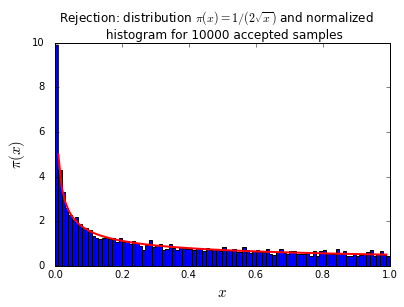

In [59]:
y_max = 100.0
x_cut = 1.0
n_data = 10000
data = []
n_accept = 0
while n_accept < n_data: 
    y = random.uniform(0.0, y_max)
    x = random.uniform(0.0, x_cut)
    if y < 1.0 / (2.0 * math.sqrt(x)):
        n_accept += 1
        data.append(x)

pylab.hist(data, bins=100, normed='True')
x = [a / 100.0 for a in xrange(1, 100)]
y = [1.0 / (2.0 * math.sqrt(a)) for a in x]
pylab.plot(x, y, 'red', linewidth = 2)
pylab.title('Rejection: distribution $\pi(x)={1}/{(2 \sqrt{x})}$ and normalized\
    \n histogram for '+str(n_accept)+' accepted samples',fontsize=12)
pylab.xlabel('$x$', fontsize=15)
pylab.ylabel('$\pi(x)$', fontsize=15)
pylab.show()

The result looks reasonable to the eye, but we can highlight the potential danger of this approach by comparing with the result of a Markov chain algorithm, which is not affected by the need to introduce a cutoff: we see that it rapidly gets to sample values much higher than the cutoff we were able to handle with the rejection sampling approach. You are invited to play with it and investigate the various phenomena which occur when the parameters are changed.

0.835925381221 0.2 0
1.14086788725 0.132111169458 4
1.56951470728 0.0863441314777 7
3.16455184653 0.0338977124342 13
10.8534254059 0.0065538662966 62
11.9738629434 0.00574920288106 66
12.3860912929 0.00549550544661 497
14.0842833218 0.00463027737237 949
32.658980738 0.00150863151599 1313
46.5855530156 0.000939546627005 1985
48.5380037309 0.000889496268662 9198
230.079509812 0.000111707608336 9256
265.630601199 9.2232193636e-05 34608
279.904961095 8.60146744884e-05 39724
420.99409369 4.99135747087e-05 48330
538.480111639 3.59495772881e-05 61167
750.567289401 2.30887542002e-05 90462
7616.24553415 1.05099043346e-06 202175


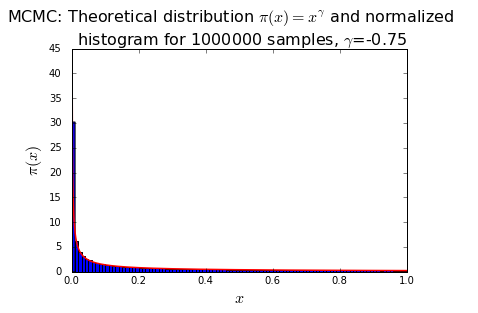

In [58]:
gamma = -0.75
x_lim = 0.001

def distrib(x):
    return x**gamma * (gamma +1)

x = 0.2
delta = 0.5
data = []
y_max = 0
n_trials = 1000000
for k in xrange(n_trials):
    x_new = x + random.uniform(-delta, delta)
    if x_new > 0.0 and x_new < 1.0:
        if random.uniform(0.0, 1.0) < distrib(x_new) / distrib(x): 
            x = x_new
    if distrib(x) > y_max: 
         y_max =  distrib(x)
         print y_max, x, k
    data.append(x)

    
pylab.hist(data, bins=100, normed='True')
pylab.xlabel('$x$', fontsize=16)
pylab.ylabel('$\pi(x)$', fontsize=16)
x = np.linspace(x_lim, 1, num = 1000)
y = distrib(x)
pylab.plot(x, y, linewidth=1.5, color='r')
pylab.title('MCMC: Theoretical distribution $\pi(x)=x^\gamma}$ and normalized\
    \n histogram for '+str(len(data))+' samples, $\gamma$='+str(gamma),fontsize=16)
pylab.show()

Even though this distribution diverges as $x \to 0$, it is possible to use sample transformation techniques in order to sample them without any trouble.

## Discrete distributions, tower sampling

In the following, imagine that a person has the choice between $k$ possible evening activities, and each of them has a different occurence rate, or probability, depending on his mood:
1. go out with firends - 0.4
2. visit family - 0.3
3. do homework - 0.8
4. do sport - 0.1
5. do laundry - 0.2
the values of $\pi_k$ are therefore known exactly, but the sampling problem remains. One way to execute it is to apply the rejection algorithm: pick an activity, with a uniform probability, and then "throw a pebble" i.e. draw a random number, with flat probability between 0 and $\pi_{\text{max}} = \max_k(\pi_k)$. The activity is done, if this last draw is lower than the probability of the chosen activity. This method will result in a sampling that follows the initial given probabilities.

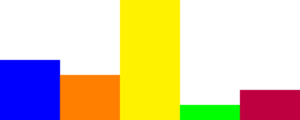

In [10]:
%%tikz --scale 2 --size 300,300 -f jpg
\draw [fill=blue, blue] (0.0, .0) rectangle (4, 4);
\draw [fill=orange, orange] (4, .0) rectangle (8, 3);
\draw [fill=yellow, yellow] (8, .0) rectangle (12, 8);
\draw [fill=green, green] (12, .0) rectangle (16, 1);
\draw [fill=purple, purple] (16, .0) rectangle (20, 2);

As in all rejection samplings, the pitfall is that the rejection rate may become quite large. For the problem at hand, the number of rejections between two accepted draws is typically of order $\pi_{\text{max}} / \pi_{\text{average}}$, which can possibly become large. The technique of tower sampling is able to overcome this difficulty.

Instead of placing the boxes one next to the other, they are piled up on top of one another, and the pebble is thrown between the bottom and the top of the tower.

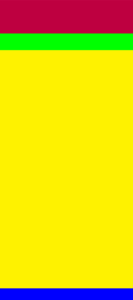

In [11]:
%%tikz --scale 2 --size 300,300 -f jpg
\draw [fill=blue, blue] (0.0, .0) rectangle (8, 4);
\draw [fill=orange, orange] (0, 4) rectangle (8, 7);
\draw [fill=yellow, yellow] (0, .7) rectangle (8, 15);
\draw [fill=green, green] (0, 15) rectangle (8, 16);
\draw [fill=purple, purple] (0, 16) rectangle (8, 18);

Here again, each activity will be picked with a probability equal to the corresponding predefined fixed probability, but the algorithm is much faster, because it is rejection free. A Python implementation is given below. Note the bisection search implemented in this example. For a low number of bins, it would be enough to just run through all bins, but this implementation is more general.

In [34]:
# bisection search to find the bin corresponding to eta
def bisection_search(eta, w_cumulative):
    kmin = 0
    kmax = len(w_cumulative)
    while True:
        k = int((kmin + kmax) / 2)
        if w_cumulative[k] < eta:
            kmin = k
        elif w_cumulative[k - 1] > eta:
            kmax = k
        else:
            return k - 1

# sample an integer number according to weights
def tower_sample(weights):
    sum_w = sum(weights)
    w_cumulative = [0.0]
    for l in xrange(len(weights)):
        w_cumulative.append(w_cumulative[l] + weights[l])
    eta = random.random() * sum_w
    sampled_choice = bisection_search(eta, w_cumulative)
    return sampled_choice

weights = [0.4, 0.3, 0.8, 0.1, 0.2]
n_samples = 20
for sample in xrange(n_samples):
    print tower_sample(weights)

4
0
2
0
2
0
1
0
3
2
1
2
0
0
1
2
0
2
4
1


This tower sampling method is rejection free, but is not optimal. The best method for sampling discrete probabilities is the Walker algorithm. The first step is to rearrange the boxes in chunks of equal height $\pi{\text{average}}$, like so:

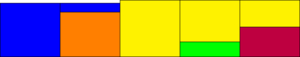

In [13]:
%%tikz --scale 2 --size 300,300 -f jpg
\draw [ultra thick, fill=blue] (0.0, .0) rectangle (4, 3.6);
\draw [ultra thick, fill=orange] (4, .0) rectangle (8, 3);
\draw [ultra thick, fill=blue] (4, 3) rectangle (8, 3.6);
\draw [ultra thick, fill=yellow] (8, .0) rectangle (12, 3.8);
\draw [ultra thick, fill=green] (12, .0) rectangle (16, 1);
\draw [ultra thick, fill=yellow] (12, 1) rectangle (16, 3.8);
\draw [ultra thick, fill=purple] (16, .0) rectangle (20, 2);
\draw [ultra thick, fill=yellow] (16, 2) rectangle (20, 3.8);

This looks very similar to the previous piling up approach, and indeed it shares the same rejection-free property. Nevertheless there is a crucial difference, in that for each thrown pebble, there is only a choice between two possibilities for the selected activity. This reduces the complexity of the algorithm: we now have a rejection free algorithm which requires a constant amouint of work per draw, independent of the number of potential activities.

[(0.05, 4, 3), (0.09999999999999998, 3, 1), (0.1, 2, 1), (0.17999999999999997, 1, 0), (0.19999999999999998, 0, 0)]


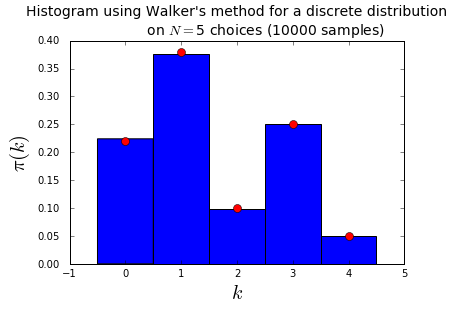

In [14]:
N = 5
pi = [[1.1 / 5.0, 0], [1.9 / 5.0, 1], [0.5 / 5.0, 2], [1.25 / 5.0, 3], [0.25 / 5.0, 4]]
x_val = [a[1] for a in pi]
y_val = [a[0] for a in pi]
pi_mean = sum(y_val) / float(N)
long_s = []
short_s = []
for p in pi:
    if p[0] > pi_mean:
        long_s.append(p)
    else:
        short_s.append(p)
table = []
for k in range(N - 1):
    e_plus = long_s.pop()
    e_minus = short_s.pop()
    table.append((e_minus[0], e_minus[1], e_plus[1]))
    e_plus[0] = e_plus[0] - (pi_mean - e_minus[0])
    if e_plus[0] < pi_mean:
        short_s.append(e_plus)
    else:
        long_s.append(e_plus)
if long_s != []: 
    table.append((long_s[0][0], long_s[0][1], long_s[0][1]))
else: 
    table.append((short_s[0][0], short_s[0][1], short_s[0][1]))
print table
samples = []
n_samples = 10000
for k in xrange(n_samples):
    Upsilon = random.uniform(0.0, pi_mean)
    i = random.randint(0, N-1)
    if Upsilon < table[i][0]:
        samples.append(table[i][1])
    else: samples.append(table[i][2])

pylab.figure()
pylab.hist(samples, bins=N, range=(-0.5, N-0.5), normed=True)
pylab.plot(x_val, y_val,'ro', ms=8)
pylab.title("Histogram using Walker's method for a discrete distribution\n\
             on $N=$"+str(N)+" choices ("+str(n_samples)+" samples)",fontsize=14)
pylab.xlabel('$k$',fontsize=20)
pylab.ylabel('$\pi(k)$',fontsize=20)
pylab.show()

## Tower sampling: continuum limit

With the knowledge acquired in the previous sections, it appears that sampling a discrete distribution is so easy that it could be extended to the sampling of a 1D continuous distribution, by discretizing it in $x$ and approximating it by a constant on each piece. Let us try to carry out this programme now. In this case, each colored section of the tower corresponds to a different slice in the support of the function $\pi(x)$. This construction may be taken to the limit of small slices, so that an envelope appears, which is defined by $\Phi(x) = \int\limits_{-\infty}^{x}dx' \pi(x')$. Assuming that $\pi(x)$ is the Gaussian distribution $\exp(-x^2 / 2) / \sqrt{2\pi},$ we end up with a new way to sample the Gaussian distribution, implemented below.

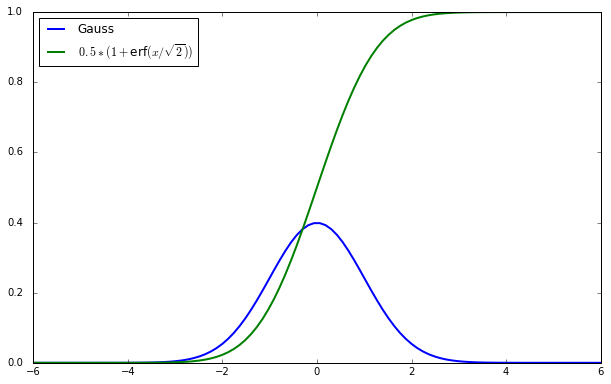

In [51]:
fig, ax = plt.subplots(figsize = (fig_width*3, fig_height*3), dpi=400, frameon=True)
xes = np.linspace(-6, 6, num=100)
ax.plot(xes, np.exp(- xes ** 2 / 2.0) / math.sqrt(2.0 * math.pi), lw=2, label='Gauss')
ax.plot(xes, 0.5 * (1.0+scipy.special.erf(xes/np.sqrt(2.0))), lw=2, label=r'$0.5 * (1+$erf$(x/\sqrt{2}))$')
ax.legend(loc=2)

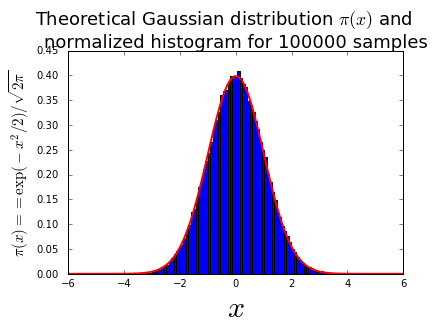

In [47]:
n_trials = 100000
data = []
for trial in xrange(n_trials):
    Upsilon = random.uniform(0.0, 1.0)
    x = math.sqrt(2.0) * scipy.special.erfinv(2.0 * Upsilon - 1.0)
    data.append(x)

##### Graphics
xlim = 6
pylab.hist(data, 100, normed = 'True')
x = np.linspace(-xlim, xlim, num=100)
y = np.exp(- x ** 2 / 2.0) / math.sqrt(2.0 * math.pi)
pylab.plot(x, y, c='red', linewidth=2.0)
pylab.title('Theoretical Gaussian distribution $\pi(x)$ and \
    \nnormalized histogram for '+str(len(data))+' samples', fontsize = 18)
pylab.xlabel('$x$', fontsize = 30)
pylab.ylabel('$\pi(x)==\exp(-x^2 / 2) / \sqrt{2\pi}$', fontsize = 15)
pylab.savefig('plot_gauss_transform.pdf')
pylab.show()

As you can see in the code, one of the difficulties is that we have to first compute a primitive of the distribution $\pi(x)$. In the case of the Gaussian distribution, the integral $\Phi(x) \equiv \int\limits_{-infty}^{x} \exp(-x^2/2) = \dfrac{1}{2} \biggl[ 1 + erf \bigl( \dfrac{x}{\sqrt{2}} \bigr)\biggr]$ where $erf(x) \equiv \dfrac{2}{\sqrt{\pi}} \int\limits_0^x dx' e^{-x'^2}$ is the "error function". It cannot be expressed by a simple formula, but has been studied by mathematicians for centuries and can be evaluated numerically with high efficiency.

Nevertheless, what we need to use is not $\Phi(x)$ itself, but rather its inverse $x = \Phi^{-1}(\Upsilon)$, where $\Upsilon$ is a random variable sampled between 0 and 1

$$\Phi(x) = \dfrac{1}{2} \biggl[ 1 + erf \bigl( \dfrac{x}{\sqrt{2}} \bigr)\biggr] \Leftrightarrow x = \sqrt{2}erf^{-1}(2\Phi -1)$$ where $erf^{-1}$ is the inverse error function, which can be evaluated numerically very efficiently as well, using scipy.special.erfinv in Python.

### Summary

In order to extend the tower sampling approach to the continuum limit, we need to apply the following procedure:

1. $\Pi_k = \Pi_{k-1} + \pi_k \leftrightarrow \Phi(x) = \int\limits_{-\infty}^x dx' \pi(x')$
2. Draw $\Upsilon$ with uniform probability between 0 and 1, and find $k$ such that $\Pi_{k-1} < \Upsilon < \Pi_k \leftrightarrow$ find $x, \Phi(x) = \Upsilon$, i.e. $x = \{hi^{-1}(\Upsilon)$

It must be noted that the determination of $\Phi$ is not always possible in an analytical way. Nevertheless, it is usually a relatively regular function, even if $\pi$ is discontinuous or presents divergences: since $\pi(x)$ is integrable and positive, $\Phi{x}$ is a monotonous function going from 0 to 1, producing a relatively stable process.

### $\pi(x) = K x^\gamma$ for $0< x \leq 1$

In the previous section, we skimmed through the case $\gamma = -0.5$, and the case $\gamma = 2$ was handled when we considered 3D spheres. In the below, we implement the sample transformation approach introduced above, in order to handle the general case. Note the difference with the rejection method, and the match with the MCMC result.

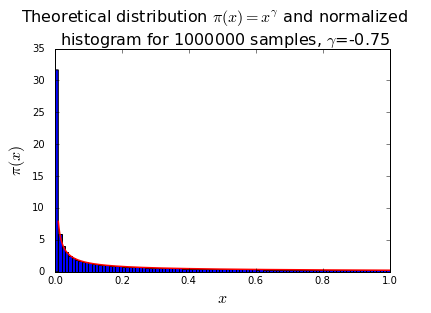

In [57]:
gamma = -0.75
x_lim = 0.01

def phi(x):
    return x**(1.0 / (gamma + 1.0))

def distrib(x):
    return x**gamma * (gamma +1)

n_trials = 1000000
data = []
for trial in xrange(n_trials):
    upsilon = random.uniform(0.0, 1.0)
    x = phi(upsilon)
    data.append(x)


pylab.hist(data, bins=100, normed='True')
pylab.xlabel('$x$', fontsize=16)
pylab.ylabel('$\pi(x)$', fontsize=16)
x = np.linspace(x_lim, 1, num = 1000)
y = distrib(x)
pylab.plot(x, y, linewidth=1.5, color='r')
pylab.title('Theoretical distribution $\pi(x)=x^\gamma}$ and normalized\
    \n histogram for '+str(len(data))+' samples, $\gamma$='+str(gamma),fontsize=16)
pylab.show()

With the proper normalization, we get $\Phi(x) = x^{1+\gamma}$, leading to $x = \Upsilon^{1/(1+\gamma)}$, with $\Upsilon$ a random number with a uniform probability between 0 and 1.

As a conclusion, we have shown that in the context of the problems presented in this Tutorial, i.e. discrete of low dimensional situations, it is possible to not have to use Markov chain algorithms. The situation will be much different when we have to turn to higher dimensions.